# HOUSE PRICE PREDICTION


MACHINE LEARNING PREDICTS HOUSE
PRICES. IT ANALYZES PAST SALES DATA
(LOCATION, SIZE, FEATURES, PRICES) TO
ESTIMATE THE VALUE OF A NEW HOUSE.
THIS HELPS BUYERS, SELLERS, AND REAL
ESTATE AGENTS MAKE INFORMED
DECISIONS.

# Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load and Inspect Data

In [2]:

data_path = 'Housing_Data.csv'
df = pd.read_csv(data_path)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,LONGITUDE,LATITUDE
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,12.969910,77.597960
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12.274538,76.644605
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12.778033,77.632191
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,28.642300,77.344500
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,22.592200,88.484911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,18.129209,76.758924
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,22.300000,73.200000
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,12.981600,77.672900
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,18.966670,72.833330


In [3]:
# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement   
0  13300000  7420         4          2        3      yes        no       no  \
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus   
0              no             yes        2      yes        furnished  \
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished   
4              no             yes        2       no        furnished   

   LONGITUDE   LATITUDE  
0  12.969910  77.597960  
1  12.274

In [4]:
# Get a summary of the dataset
print("\nSummary of the dataset:")
df.describe()


Summary of the dataset:


,price,area,bedrooms,bathrooms,stories,parking,LONGITUDE,LATITUDE
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,21.112088,76.805861
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,6.175164,8.628211
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,9.893479,-86.152929
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,17.683330,73.890009
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,20.742166,77.347688
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,26.900926,77.712151
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,50.817397,91.827348


In [5]:
# Get information about the dataset
print("\nInformation about the dataset:")
df.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
 13  LONGITUDE         545 non-null    float64
 14  LATITUDE          545 non-null    float64
dtypes: float64(2), int64(6), object(7)
memory usage: 64.0+ KB


In [6]:
# Check for missing values
print("\nMissing values in the dataset:")
df.isnull().sum()


Missing values in the dataset:


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
LONGITUDE           0
LATITUDE            0
dtype: int64

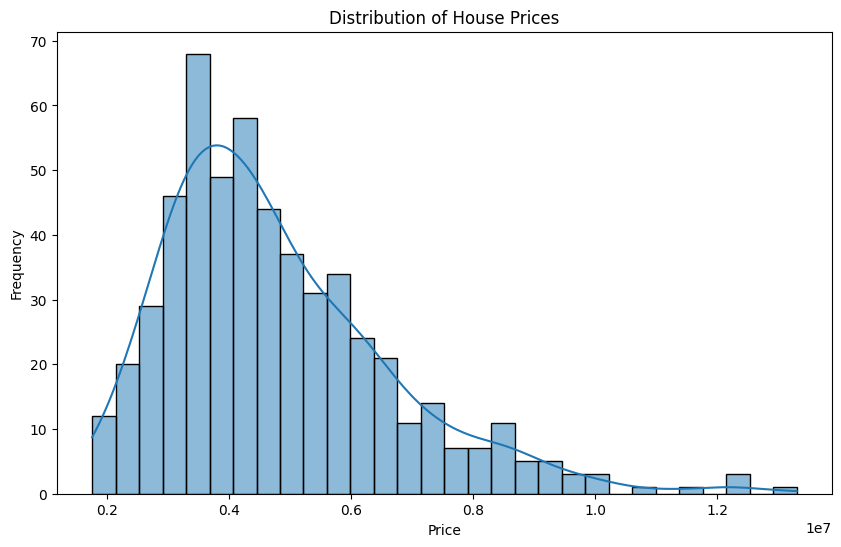

In [7]:
# Distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'],kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

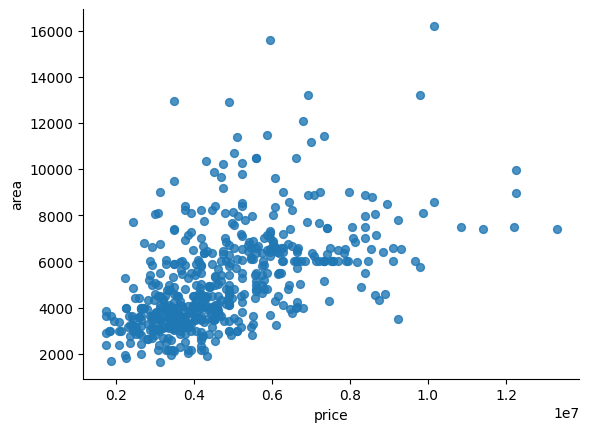

In [8]:
# price vs area

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='price', y='area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

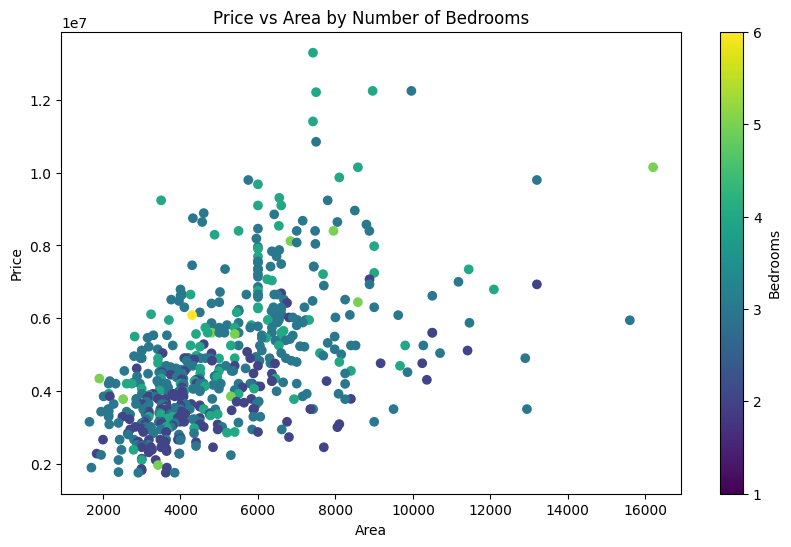

In [9]:
# Price vs Area by Number of Bedrooms

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], c=df['bedrooms'], cmap='viridis')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area by Number of Bedrooms')
_ = plt.colorbar(label='Bedrooms')

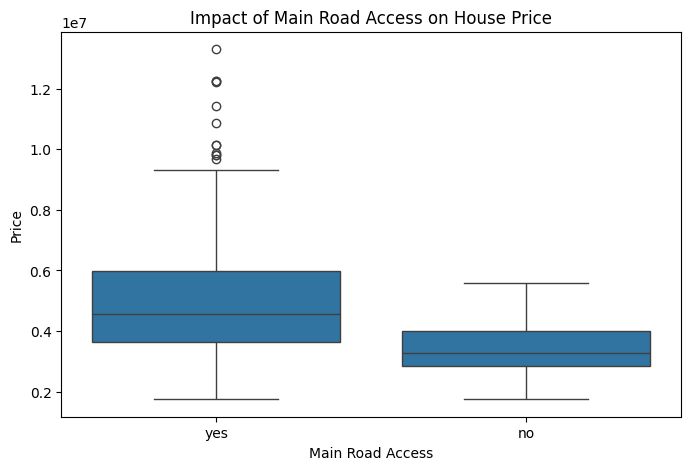

In [10]:
# Impact of Features on House Price

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='mainroad', y='price')
plt.xlabel('Main Road Access')
plt.ylabel('Price')
_ = plt.title('Impact of Main Road Access on House Price')



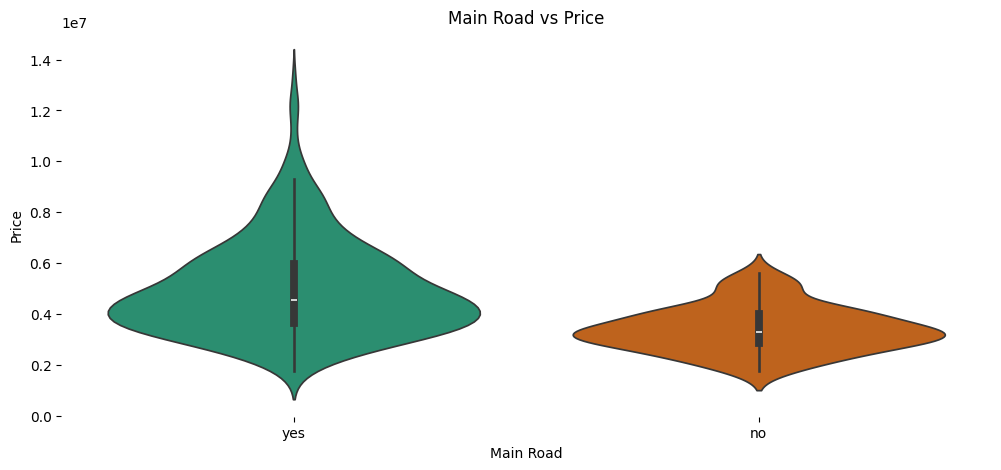

In [11]:
#mainroad vs price

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 2.5 * len(df['mainroad'].unique()))
plt.figure(figsize=figsize)

sns.violinplot(data=df, x='mainroad', y='price', inner='box', palette='Dark2', hue='mainroad', legend=False)

# Remove unnecessary spines
sns.despine(top=True, right=True, bottom=True, left=True)

plt.title('Main Road vs Price')
plt.xlabel('Main Road')
plt.ylabel('Price')

plt.show()

# Data Preprocessing

Data Encoding 

In [12]:
# Handle missing values (if any)
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom   
0  13300000  7420         4          2        3         1          0  \
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea   
0         0                0                1        2         1  \
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  LONGITUDE   LATITUDE  
0                 0  12.969910  77.597960  
1                 0  12.274538  76.644605  
2                 1  12.77

Splitting Dataset

In [13]:
# Separate features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']
print(X)
y


     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement   
0    7420         4          2        3         1          0         0  \
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus   
0                  0             

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Correlation Heatmap

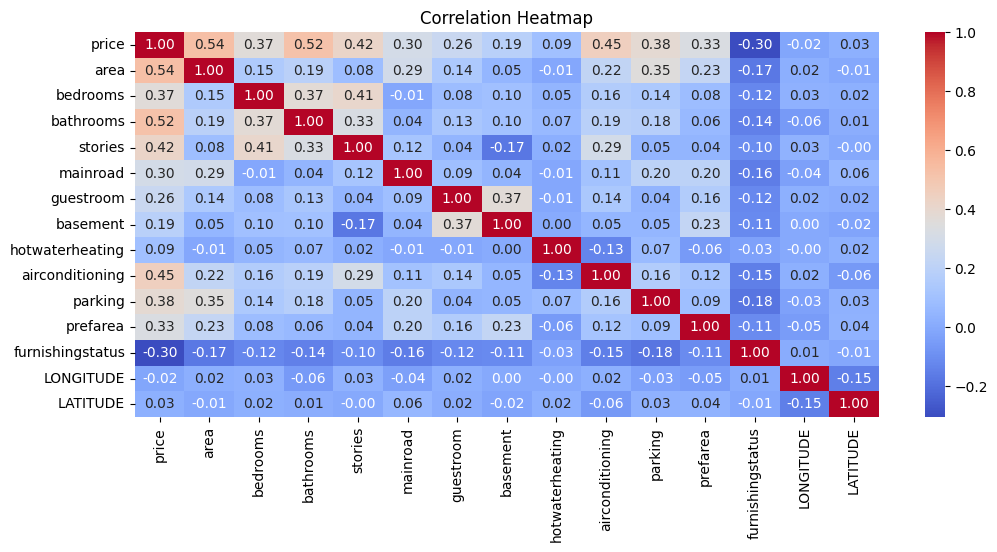

In [15]:
# Correlation heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Train the Model

In [16]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

# Model Evaluation


Predictions and Metrics

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 1769561693837.51
R-squared: 0.65


Actual vs Predicted Prices

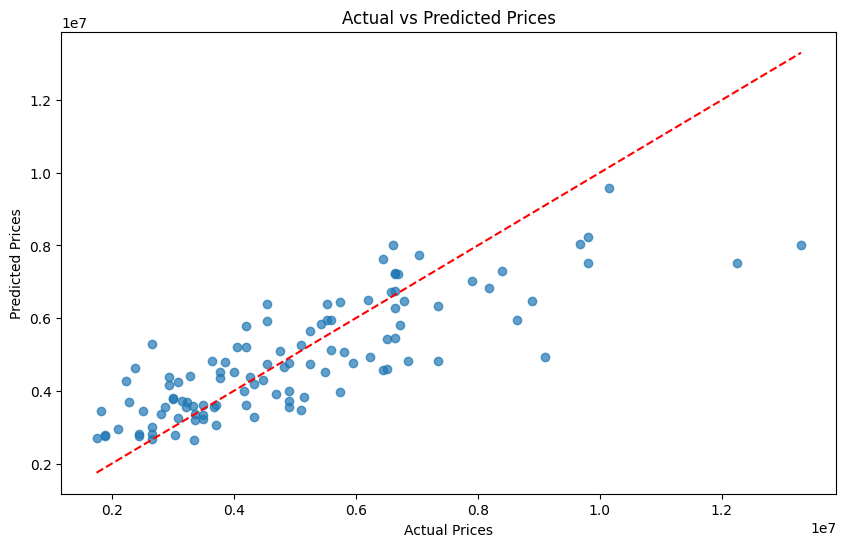

In [18]:
# Scatter plot for Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


Residual Plot

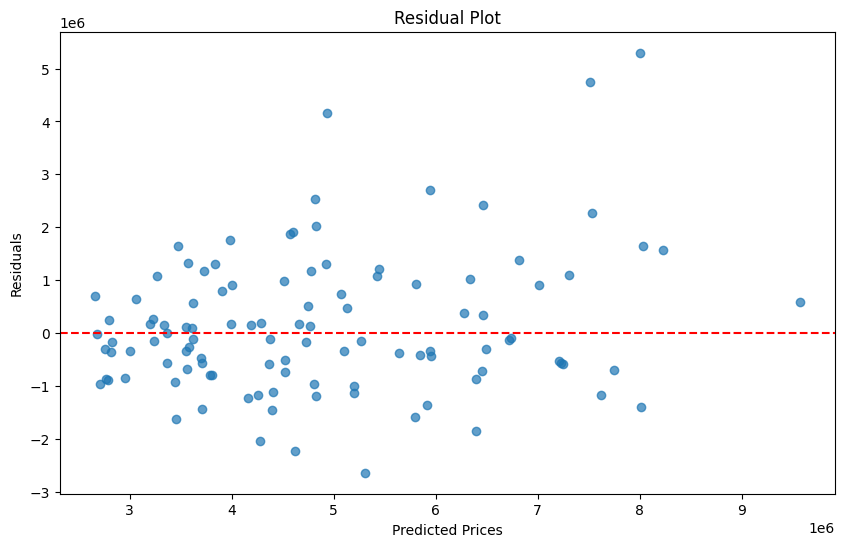

In [19]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


#  Feature Importance

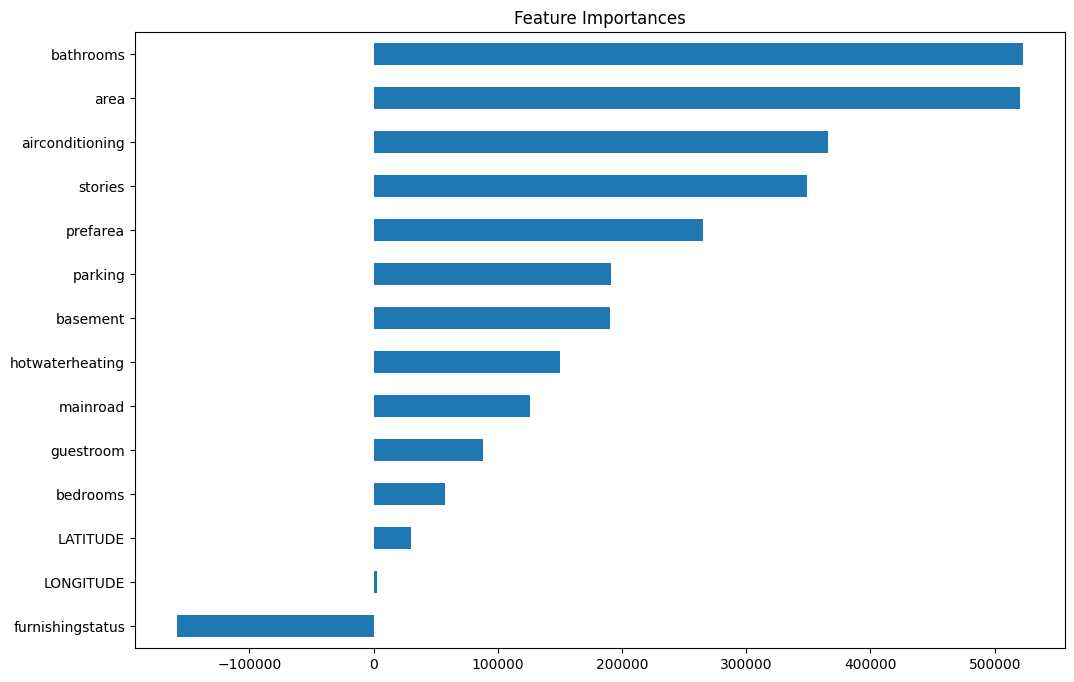

In [20]:
# Coefficients of the model
coefficients = pd.Series(model.coef_, index=X.columns)

# Bar plot of feature importances
plt.figure(figsize=(12, 8))
coefficients.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()


# Predict Price for New Data

In [21]:
# Predict price for new data
new_data = pd.DataFrame([[1000, 3, 2, 2, 'yes', 'no', 'no', 'no', 'yes', 2, 'yes', 'furnished', 15.969910, 17.597960]], 
                         columns=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                                  'airconditioning', 'parking', 'prefarea', 'furnishingstatus', 'LATITUDE', 'LONGITUDE'])

# Ensure the new data has the same columns and order as the training data
new_data = new_data[X.columns]

# Encode new data
for column in new_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        new_data[column] = label_encoders[column].transform(new_data[column])
    else:
        raise KeyError(f"Column '{column}' not found in label_encoders. Ensure it exists in the training data.")

# Standardize new data
new_data_scaled = scaler.transform(new_data)

# Predict the price
predicted_price = model.predict(new_data_scaled)
print(f'Predicted Price for the new data: {predicted_price[0]:.2f}')


Predicted Price for the new data: 5806159.59
